In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata)



# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [90]:
# Checking the number of mice
MouseCount = study_data_complete['Mouse ID'].nunique()
MouseCount

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoints_series = study_data_complete.duplicated(["Mouse ID", "Timepoint"])


# Subset the school_data_complete dataframe using the boolean series
duplicates = study_data_complete.loc[duplicate_timepoints_series]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = duplicates["Mouse ID"].unique()


# Drop all rows with the duplicate mouse ID from study_data_complete
study_data_clean = study_data_complete.drop(study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_id)].index)
study_data_clean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [100]:
# Checking the number of mice
MouseCountClean = study_data_clean['Mouse ID'].nunique()
MouseCountClean

248

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Find the Mean of tumor volume
regimen_tumorvolume_mean = study_data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_tumorvolume_mean
#Find Median of tumor volume
regimen_tumorvolume_median = study_data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_tumorvolume_median
#Find Variance of tumor volume
regimen_tumorvolume_variance = study_data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_tumorvolume_variance
#Find Standard Dev of tumor volume
regimen_tumorvolume_standarddev = study_data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_tumorvolume_standarddev
#Find Standard Dev of tumor volume
regimen_tumorvolume_SEM = study_data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
regimen_tumorvolume_SEM

# Create a DataFrame called `Tumor_Volume_Data` that breaks down tumor volume by drug regimen
# create a list of the series objects
series_list = [regimen_tumorvolume_mean, regimen_tumorvolume_median, regimen_tumorvolume_variance, regimen_tumorvolume_standarddev, regimen_tumorvolume_SEM]

# use pd.concat to concatenate the series objects horizontally
Tumor_Volume_Data = pd.concat(series_list, axis=1)

# Assign new column names to the Tumor_Volume_Data dataframe
Tumor_Volume_Data.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the updated dataframe
Tumor_Volume_Data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics = study_data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

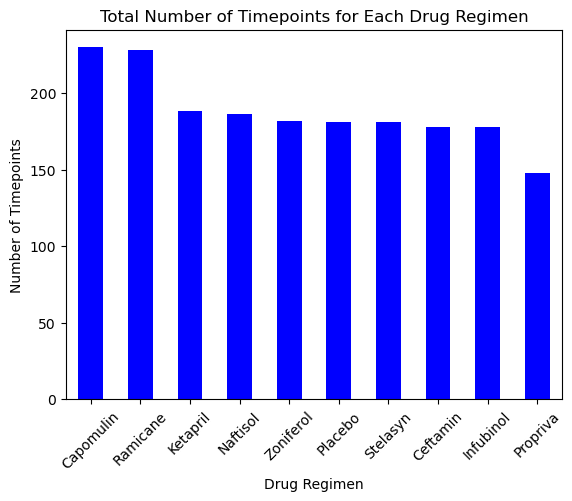

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by drug regimen and count the number of timepoints
timepoints_per_regimen = study_data_clean.groupby('Drug Regimen')['Timepoint'].count()

# Sort the values in descending order
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)

# Create a bar plot using Pandas
timepoints_per_regimen.plot(kind='bar', color='blue')


# Add labels and title
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)

# Show the plot
plt.show()

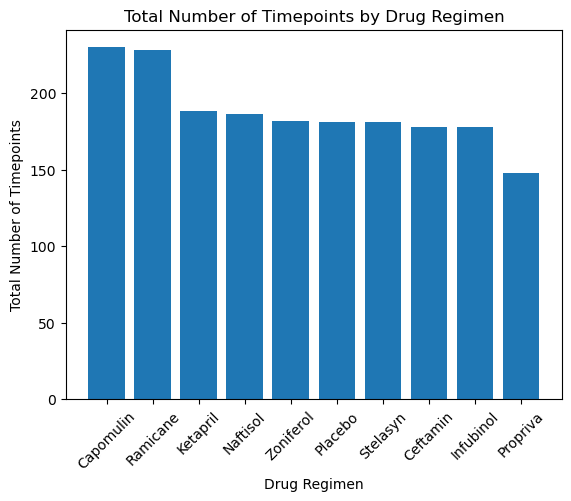

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group by drug regimen and count the number of timepoints
timepoints_per_regimen = study_data_clean.groupby('Drug Regimen')['Timepoint'].count()

# Sort the values in descending order
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)

# create a bar plot

plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values)

# set plot title and axis labels
plt.title("Total Number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# rotate x-axis labels for readability
plt.xticks(rotation=45)

# display the plot
plt.show()

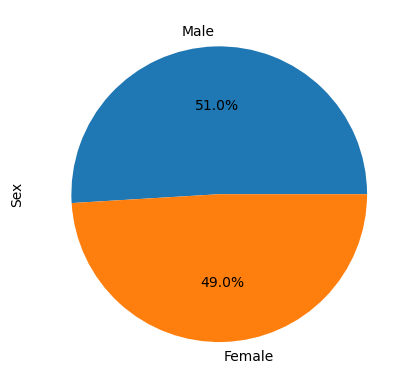

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get the number of each sex in the data
sex_counts = study_data_clean["Sex"].value_counts()


# Create a pie chart of the gender distribution using Pandas
sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()


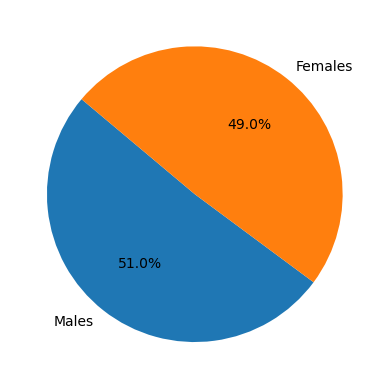

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the number of each sex in the data
sex_counts = study_data_clean["Sex"].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex_counts, autopct="%1.1f%%", labels=["Males", "Females"], startangle=140)
plt.show()




In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = study_data_clean.drop_duplicates(subset='Mouse ID', keep='last')
# then cut data to include only the treatments we want
# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the final_tumor_volume dataframe to only include the four treatment regimens
filtered_data = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatments)]
filtered_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
214,c326,5,36.321346,0,Infubinol,Female,18,25
224,c139,45,72.226731,2,Infubinol,Male,11,28
226,v339,5,46.250112,0,Infubinol,Male,20,26
233,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [164]:
# Put treatments into a list for a for loop (and later for plot labels)
# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Create a list of the total final tumor volumes for each drug regimen and store it in tumor_vol_data

#add subset
for treatment in treatments:
    # Filter the data to include only the specified treatment
    treatment_data = filtered_data.loc[filtered_data["Drug Regimen"] == treatment]
    
    # Get the last (greatest) timepoint for each mouse
    max_timepoints = treatment_data.groupby("Mouse ID")["Timepoint"].max()
    
    # Merge the max timepoints with the original data to get the corresponding tumor volumes
    merged_data_filtered = pd.merge(treatment_data, max_timepoints, on=["Mouse ID", "Timepoint"])
    merged_data_list = list(merged_data_filtered["Tumor Volume (mm3)"])
    tumor_vol_data.append(merged_data_list)

    # do the IQR calculations now for the dataframe
    quartiles = merged_data_filtered["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # calculate actual bounds using quartile formulas
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds and store as a pd.Series
    outliers = pd.Series(merged_data_list)[(pd.Series(merged_data_list) < lower_bound ) | (pd.Series(merged_data_list) > upper_bound)].values

    # print it
    print(f"{treatment}'s potential outliers:")
    print(outliers)
   
    


Capomulin's potential outliers:
[]
Ramicane's potential outliers:
[]
Infubinol's potential outliers:
[36.3213458]
Ceftamin's potential outliers:
[]


C:\Users\Amand\AppData\Local\Temp\ipykernel_6768\206768859.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


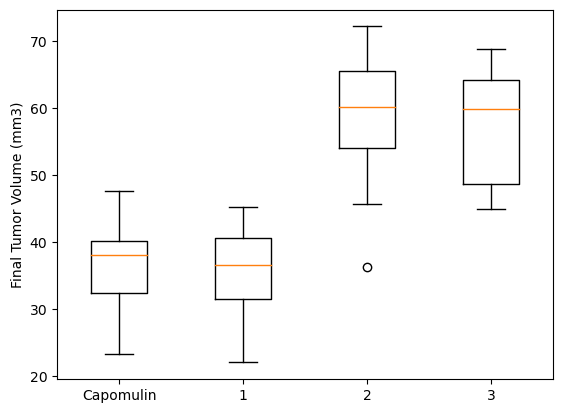

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Set the box plot parameters
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)

# Create the box plot
ax1.boxplot(tumor_vol_data)

# Show the plot
plt.show()

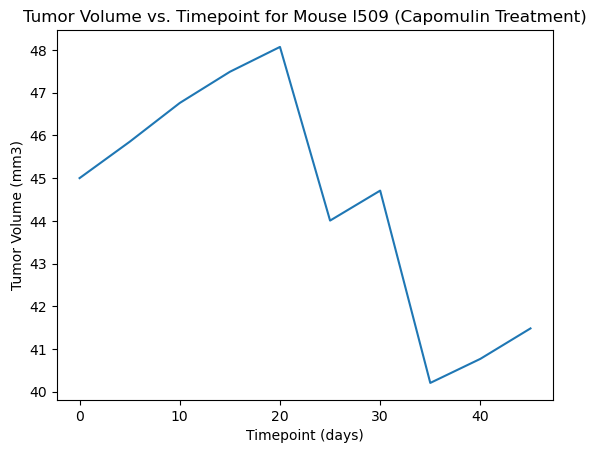

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Tumor volume and time points are in the original study data dataframe, so we will be pulling from that
# Pull the data for a single mouse treated with Capomulin, including all of the timepoints for that mouse

# Select a mouse ID to plot
mouse_id = "l509"

# Filter the data to only include the selected mouse
mouse_data = filtered_data.loc[filtered_data["Mouse ID"] == mouse_id]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Add axis labels and a title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id}")
plt.show()

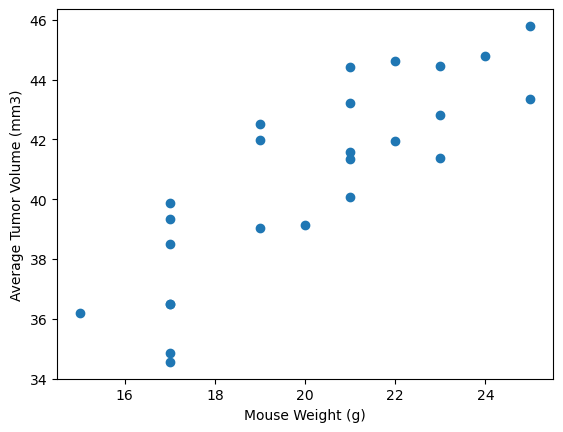

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# For a scatter plot, points will need 

# Filter the data to only include Capomulin data
capomulin_data = filtered_data.loc[filtered_data["Drug Regimen"] == "Capomulin"]

# Group the data by mouse ID
capomulin_grouped = capomulin_data.groupby("Mouse ID")

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_vol = capomulin_grouped["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_grouped["Weight (g)"].mean()

# Create a scatter plot with average tumor volume on the y-axis and mouse weight on the x-axis
plt.scatter(mouse_weight, avg_tumor_vol)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show plot
plt.show()

The correlation between both factors is 0.84


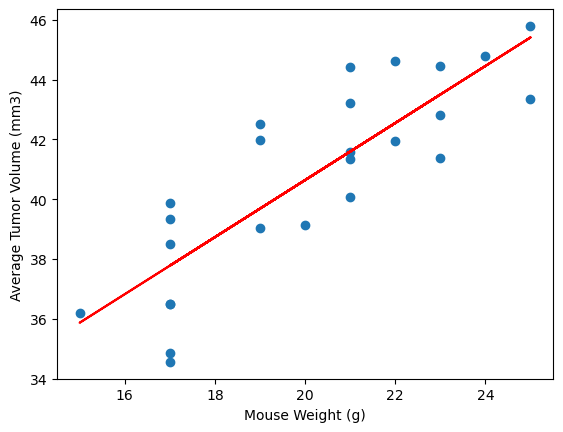

In [180]:

# Calculate the correlation coefficient and linear regression model 

# The library to calculate correlation and regression is scipy.stats - code taken from Activities examples
# st.pearsonr() is fpr correlation
# st.linregress() is for regression
import scipy.stats as st

# Calculate the corelation and then print it
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(mouse_weight,avg_tumor_vol)
# Plot the regression line
plt.plot(mouse_weight,regress_values,"r-")
# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()